In [1]:
paths = {
    "AIDA": "Results/AIDA/Google/gemini-2.5-flash-lite/2025-11-03_08-15-42/predictions_test.txt",
    "shadowlinks-shadow": "Results/shadowlinks-shadow/Google/gemini-2.5-flash-lite/2025-11-04_01-04-04/predictions_test.txt",
    "shadowlinks-tail": "Results/shadowlinks-tail/Google/gemini-2.5-flash-lite/2025-11-04_03-59-20/predictions_test.txt",
    "reddit-comments": "Results/reddit-comments/Google/gemini-2.5-flash-lite/2025-11-03_23-17-22/predictions_test.txt",
    "tweeki": "Results/tweeki/Google/gemini-2.5-flash-lite/2025-11-03_21-28-30/predictions_test.txt"
}

In [2]:
data = {}
for dataset, path in paths.items():
    data[dataset] = []
    with open(path, 'r') as file:
        lines = file.readlines()

    # Remove all lines that don't start with '"'
    lines = [line for line in lines if line.startswith('"') and '---' in line]

    parsed_lines = []
    for line in lines:
        parsed_lines.extend(line.split(')]"'))
    
    for idx, line in enumerate(parsed_lines):
        top_k_split = line.split('---')[3].strip()

        top_k_vals = top_k_split.split('), (')
        score_1 = float(top_k_vals[0].replace('(', '').replace(')', '').replace('[ ', '').replace(' ]', '').split(', ')[1].strip())
        score_2 = float(top_k_vals[1].replace('(', '').replace(')', '').replace('[ ', '').replace(' ]', '').split(', ')[1].strip())
        data[dataset].append(abs(score_1 - score_2))
    
    data[dataset].sort()

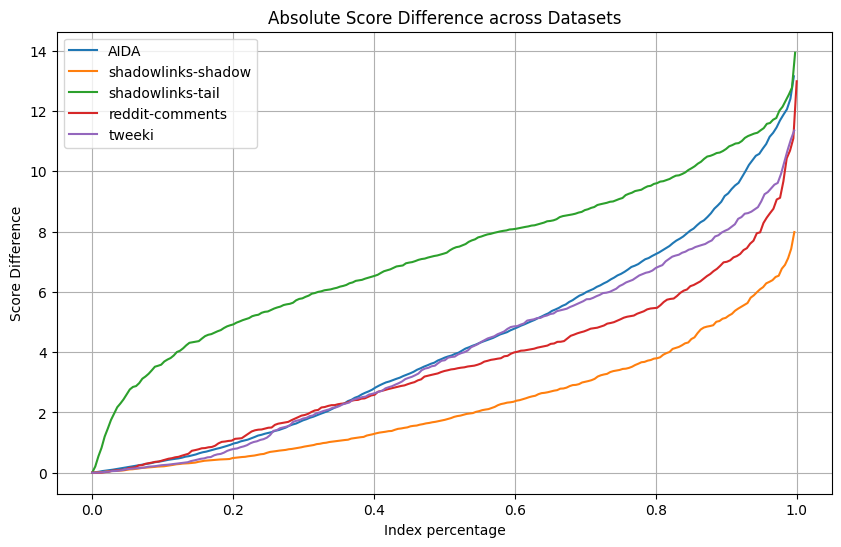

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

for dataset, data_list in data.items():
    n = len(data_list)
    step = max(1, n // 200)  # 100 points ≈ every 1%
    sampled_indices = np.arange(0, n, step)
    sampled_data = np.array(data_list)[sampled_indices]

    # Convert index to percentage of total length
    percent_x = (sampled_indices / (n - 1))

    plt.plot(percent_x, sampled_data, label=dataset)

plt.title("Absolute Score Difference across Datasets")
plt.xlabel("Index percentage")
plt.ylabel("Score Difference")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
dataset = "AIDA"
percentage = 0.4176

index = int(len(data[dataset]) * percentage)
threshold_value = data[dataset][index]
print(f"Threshold value at {percentage*100}% for {dataset}: {threshold_value}")

Threshold value at 41.760000000000005% for AIDA: 2.999734878540039
